# Task 6 


Exploring new york flights data. Using differet 5 datasets from new york flights and visualizing some usefull readings.The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

##### Oral health recommendation
This section provides data on several oral health topics including tooth count, coronal caries, root caries, dental sealants, and recommendations for dental care. These data are released in the two following data files:

Dentition Exam (P_OHXDEN) - Includes data on tooth count, coronal caries, root caries, and dental sealants.
Recommendation of Care (P_OHXREF) - Includes data on dental care recommendations and exam position.
##### Total Cholesterol
The laboratory method used to measure total cholesterol is an enzymatic assay. In this enzymatic assay, esterified cholesterol is converted to cholesterol by cholesterol esterase. The resulting cholesterol is then acted upon by cholesterol oxidase to produce cholest-4-en-3-one and hydrogen peroxide. The hydrogen peroxide then reacts with 4-aminophenazone in the presence of peroxidase to produce a colored product that is measured at 505 nm (secondary wavelength = 700 nm). The final step is known as the Trinder reaction. This method is a single reagent, endpoint reaction that is specific for cholesterol.
##### Dietery supliment using 24 hours. 
The objective of the dietary interview component is to obtain detailed dietary intake information from NHANES participants. This documentation describes the data files associated only with the collection of dietary supplements and non-prescription antacid use.
The objective of the 24-hour dietary supplement use component is to obtain information from NHANES participants on the types and amounts of dietary supplements (DS) consumed during the 24-hour period prior to the interview (midnight to midnight); and to estimate the intake of nutrients from those dietary supplements. From 1999-2006, the 24-hour dietary recall interviews, or dietary interviews, only asked about food and beverages consumed. Since 2007, data has been collected on the usage of all vitamins, minerals, herbals, and other dietary supplements as well as non-prescription antacids, as part of the dietary interview, directly following the collection of dietary intakes from foods and beverages.
##### Body Measurements
NHANES body measures data are used to monitor trends in infant and child growth, to estimate the prevalence of overweight and obesity in U.S. children, adolescents, and adults, and to examine the associations between body weight and the health and nutritional status of the U.S. population.
##### Alchoal Usage
NHANES alcohol questions asked to adults 18 and over were changed between the 2015-2016 cycle and the 2017-March 2020 pre-pandemic cycle. These changes are described in the Analytic Notes of the 2017-2018 alcohol use data documentation.

#### Import Modules
Here in this part I'll be importing some of basic libraries to read datasets and visulaize them. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

### Reading Data 
Now that we have data in over disk and it is in SaaS data format we can read this data in a pandas dataframe using `pd.read_sas` this method takes an argument that is the path of documnet with the extention of the file that we are using like in this part we have .XPT which is the format of stored datasets. at last I also gave index that represetns that the index can be ignored. I am reading here 5 different datasets in different dataframes. 

In [2]:
alchoal = pd.read_sas("/kaggle/input/nahaes-data-17-22/P_ALQ"+'.XPT', index=None)
body_measure = pd.read_sas("/kaggle/input/nahaes-data-17-22/P_BMX (1)"+'.XPT', index =None)
blood_pressure = pd.read_sas("/kaggle/input/nahaes-data-17-22/P_BPQ"+'.XPT', index =None)
oral_health = pd.read_sas("/kaggle/input/nahes-data/P_OHXREF"+'.XPT', index =None)
dietery_supliment = pd.read_sas("/kaggle/input/nahes-data/P_DS1TOT"+'.XPT', index =None)

### Merging Data
We have 5 different dataframes here above that we have to add in a single dataframe so that we can combinely use this single dataframe in our analysis, this dataframe can be combined with pandas merge method which takes an argument of dataframe and another argument of how to merge two dataframes. In this case I have to merge 5 dataframes so I'll be using merege for 5 times. 

In [3]:
mergedf = alchoal.merge(body_measure, how='left').merge(blood_pressure, how='left').merge(oral_health,how='left').merge(dietery_supliment,how='left')
print('Merged data frame:')
display(mergedf)

Merged data frame:


,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170,...,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,109266.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109271.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109273.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109274.0,1.0,4.000000e+00,2.0,5.000000e+00,7.000000e+00,5.397605e-79,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109282.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,124815.0,1.0,3.000000e+00,1.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8961,124817.0,1.0,3.000000e+00,2.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8962,124818.0,1.0,9.000000e+00,2.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8963,124821.0,1.0,5.000000e+00,5.0,7.000000e+00,5.397605e-79,5.397605e-79,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above is the data as you can see we have 8965 total of rows in data and 46 columns after mergins all 5 dataframes, here length of all dataframes was change which is now made equal by putting 0 in empty values. 

#### Null Values 
From the data we can see that there are so many nan values in the dataframe which can make problem while analysis of this dataset. we can handle thees null values with different ways by deleting rows, or filling with average, mean or any other statistical measurement. here I'll be filling all these nan values with 0. 

In [4]:
mergedf = mergedf.fillna(0)

Now that we have replaced all nan values we can see that nan are completely removed here. 

In [5]:
mergedf

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170,...,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,109266.0,1.0,1.000000e+01,1.0,5.397605e-79,0.000000e+00,0.000000e+00,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109271.0,1.0,5.397605e-79,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109273.0,1.0,5.397605e-79,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109274.0,1.0,4.000000e+00,2.0,5.000000e+00,7.000000e+00,5.397605e-79,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109282.0,1.0,5.397605e-79,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,124815.0,1.0,3.000000e+00,1.0,5.397605e-79,0.000000e+00,0.000000e+00,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8961,124817.0,1.0,3.000000e+00,2.0,5.397605e-79,0.000000e+00,0.000000e+00,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8962,124818.0,1.0,9.000000e+00,2.0,5.397605e-79,0.000000e+00,0.000000e+00,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8963,124821.0,1.0,5.000000e+00,5.0,7.000000e+00,5.397605e-79,5.397605e-79,0.0,2.0,5.397605e-79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Graph 1 
When blood cholesterol last checked ?
This data column defines how often blood cholestrol is checked, following are the unique value of column. In this visualization I will be giving these columns to seaborn plot which given complete information related to this part of data. 
- Less than 1 year ago
- year but less than 2 years ago
- years but less than 5 years ago
- years or more
- Refused
- Don't know
- Missing
Here I am using seaborn library to plot this visualization, To get information I am extracting mean, median, and mode of the data, using `dataframe.mean() dataframe.mode() dataframe.median()`  these give me values for all these statistical information, that I plot using box plot and bar plot. 

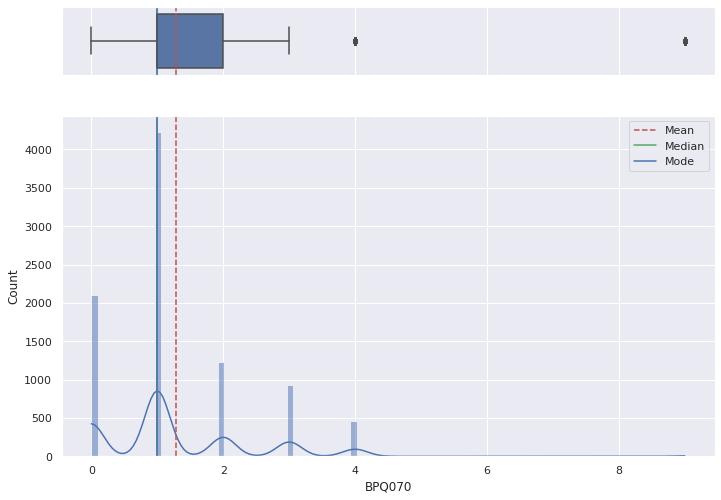

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=mergedf['BPQ070'].mean()
median=mergedf['BPQ070'].median()
mode=mergedf['BPQ070'].mode().values[0]

sns.boxplot(data=mergedf, x="BPQ070", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=mergedf, x="BPQ070", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

This graph is about cholestrol cheking, this graph shows the mean, median, and mode of cholestrol level ceking at multiple times a day. This graph shows that most of the poplet get theier cholestrol level checked in a time period of less then 2 years. mean of data lies between 1 and 2 years while having very few of the outliers in the data. This graph also shows the distribution of data as a blue line can be seen which shows how this data is distributed. 

##### Graph 2
In this particular plot I explore the `Intake day of the week` this data shows what was the intake day while getting sample data for dietery analysis. This graph shows which was the most rushed day or when do people came mostly. This data is taken from dietery recordings of national healths dataset. 

- 1	Sunday
- 2	Monday
- 3	Tuesday
- 4	Wednesday
- 5	Thursday
- 6	Friday
- 7	Saturday

I am using seaborn library of visualization to plot a histogram having a visible distribution of data. This is completed using `sns.histplot()` and to set the size of figure I have used `sns.set()` which is used to change the default figure size for seaborn visualizations. 

In [7]:
!pip install pygal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 966.2 kB/s eta 0:00:00a 0:00:01


In [8]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 574.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=56086e595932df31540fdb1335213d32b360b79ba69c9490ae8f36923f16c1e3
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


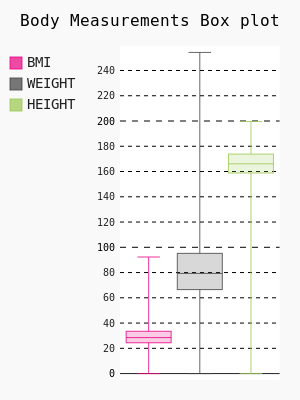

In [9]:
import pygal
from pygal.style import Style
custom_style = Style(colors=('#E80080', '#404040', '#9BC850', '#E81190'))\

box_chart = pygal.Box(height=400,width = 300,style=custom_style)
box_chart.title = "Body Measurements Box plot"
box_chart.add("BMI", mergedf['BMXBMI'])
box_chart.add("WEIGHT",mergedf['BMXWT'])
box_chart.add("HEIGHT", mergedf['BMXHT'])


Above graph is bar plot of distribution type. This graph shows the distribution of data as well as the number of occurings of unique events in the data. From the figure we can visualize that Mostly people go far dietery intakes at the weekends. As weeked is off for everyone so they try to get recommendations at these days. 

#### Graph3 
In this plot I am using Blood pressure dataset which is comprised of multiple columns, in this I am just taking 3 columns from blood pressure dataset which are BPQ030, BPQ020, and BPQ070 in this I am using matplotlib `plt.plot` with different markers and using `mplcyberpunch ` to make the graph more good looking. I am ploting commulative sum of these columns data which can be find using `pd.cumsum()` which retruns the comulative sum of the values preset in a column of dataset. I have used mplcyberpunk library to give glow to the plotted lines of commulative sums. 

In [10]:
!pip install mplcyberpunk

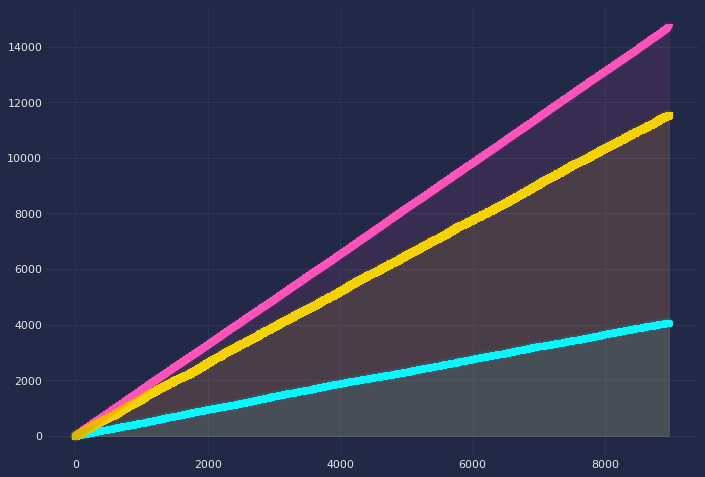

In [14]:
import mplcyberpunk
plt.style.use("cyberpunk")
 
plt.plot(mergedf['BPQ030'].cumsum(), marker='o')
plt.plot(mergedf['BPQ020'].cumsum(), marker='v')
plt.plot(mergedf['BPQ070'].cumsum(), marker='s')
 
# Add glow effects-Optional
mplcyberpunk.add_glow_effects()

After plotting this data we can visualize that these all three variables are not having different commulative sums. Graph values on horizantal scale are ranging from 2000 to 14000 and on the horizantal axis they are ranging from 0 to 8000 which is just the number of samples in the dataset. This graph has 3 lines each for different columns of the data. 

#### Graph 4
This graph is about dietery dataset which given information about Total Number of Antacids Taken by the person. In this plot we can visualize that how many and how often they take the antacids. This data variables has unique classes of 0 - 2 and some of the missing infornmation. So, in this graph I am making 4 different plots using seaborn subplots, these plots give different way of visualization for this data column. I am using here 4 plots with a `plt.subplot()` in each subplot I have made a seaborn visualization. This graph include lineplot, violinplot, boxplot, and histogram. 

<AxesSubplot:ylabel='DS1DSCNT'>

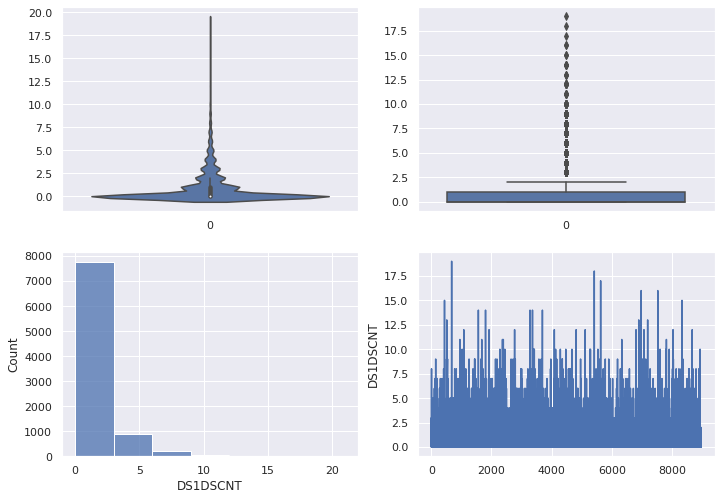

In [12]:
fig, axes = plt.subplots(2, 2)
x=mergedf.index
sns.violinplot(data=mergedf["DS1DSCNT"],ax=axes[0,0])
sns.boxplot(data=mergedf["DS1DSCNT"],ax=axes[0,1])
sns.histplot(data=mergedf["DS1DSCNT"], binwidth=3,ax=axes[1,0])
sns.lineplot(data=mergedf["DS1DSCNT"],ax=axes[1,1])

So, these graphs shows how seperated, and what frequency of data is in dietery dataset for antacids taking. data does contain some of the outliers. Here I alos have given a violin plot as we have numerical data in this part of data, so I wanted to have violin plot along with box plot which give distribution of data as well. From this graph we can conclude that data is skewed in a shape. 

#### Graph 5
BMI calculation of people. In this particular plot we will visualize the bmi category of tested people. Each sample has a assigend category of BMI depending on the BMI value. This part of data contains 4 different categories of BMI with some of missing data. 

- 1	Underweight
- 2	Normal weight
- 3	Overweight
- 4	Obese
- .	Missing
To visualize this data I am making a seaborn plot which shows the number of occurence, distribution and outliers of the data. This single graph is made using the mean, median, and mode of the data. To complete this I am making a seaborn subplots which contains, boxplot and a histplot.  

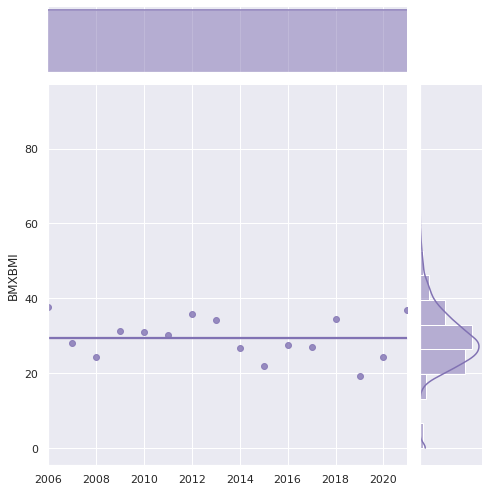

In [13]:
sns.jointplot(x=mergedf.index, y=mergedf['BMXBMI'], data=mergedf,
              kind="reg", truncate=False, marginal_kws={'bins': 14},
              xlim=(2006, 2021),
              color="m", height=7)
plt.show()

From this graph we can interprete that almost 7000 people are having 18 to 36 BMI value and mostly are at normal range of BMI. Very few are below the normal level. And Almost 1500 are over weight or obese. The mean of data lies in between 20 and 40 which is around 30, which is cleare that mostly people we overweight. Data also contains some of the outliers or even missing values. 